In [7]:
import os
import pandas as pd

# 설정
csv_path = r"C:\Users\SCK\Desktop\affectnet\labels.csv"                # 원본 CSV
source_root = r"C:\Users\SCK\Desktop\affectnet"             # 원본 이미지 폴더
target_root = r"C:\Users\SCK\Desktop\affectnet_cleaned"     # 정리된 이미지 저장 폴더
labels_to_keep = ['happy', 'sad', 'anger', 'surprise']

# CSV 로드
df = pd.read_csv(csv_path)

# 1. 필터링: 유지할 라벨만 남기기
df_filtered = df[df['label'].isin(labels_to_keep)].copy()

# 2. 폴더 정리: 대상 감정만 이미지 복사
import shutil

os.makedirs(target_root, exist_ok=True)

for _, row in df_filtered.iterrows():
    rel_path = row['pth']               # 예: anger/image0000012.jpg
    label = row['label']                # 예: anger

    src_path = os.path.join(source_root, rel_path)
    dst_dir = os.path.join(target_root, label)
    dst_path = os.path.join(dst_dir, os.path.basename(rel_path))

    os.makedirs(dst_dir, exist_ok=True)

    try:
        shutil.copy2(src_path, dst_path)  # 복사 (필요시 move로 변경 가능)
    except Exception as e:
        print(f"❌ 복사 실패: {src_path} → {dst_path} ({e})")

# 3. 새 CSV 저장
df_filtered.to_csv(r"C:\Users\SCK\Desktop\affectnet_cleaned\labels_filtered_cleaned.csv", index=False)
print("✅ 완료: 불필요 감정 제거 후 CSV 및 이미지 정리 완료.")

✅ 완료: 불필요 감정 제거 후 CSV 및 이미지 정리 완료.


anger: 4149 images
happy: 4330 images
sad: 3344 images
surprise: 4764 images


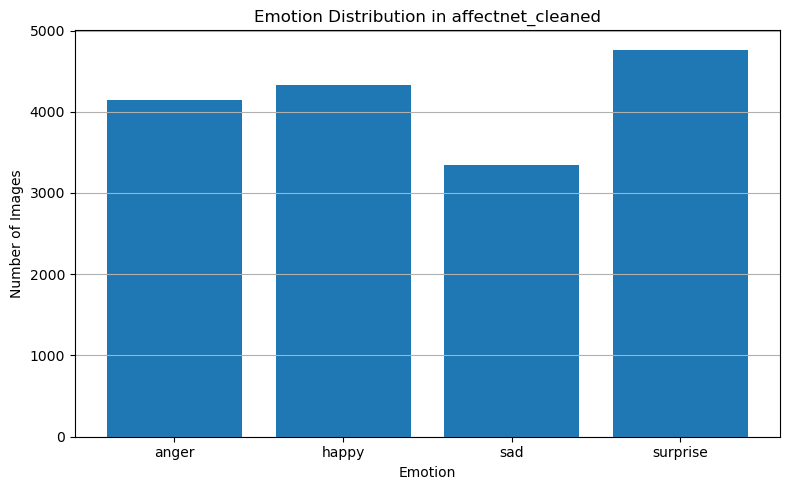

In [9]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# 새로 정리된 이미지 폴더
cleaned_root = r"C:\Users\SCK\Desktop\affectnet_cleaned"

# 감정별 이미지 수 집계
emotion_counts = defaultdict(int)

for emotion in os.listdir(cleaned_root):
    emotion_path = os.path.join(cleaned_root, emotion)
    if os.path.isdir(emotion_path):
        image_files = [f for f in os.listdir(emotion_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        emotion_counts[emotion] = len(image_files)

# 텍스트 출력
for emotion, count in sorted(emotion_counts.items()):
    print(f"{emotion}: {count} images")

# 시각화 (선택)
plt.figure(figsize=(8, 5))
plt.bar(emotion_counts.keys(), emotion_counts.values())
plt.title("Emotion Distribution in affectnet_cleaned")
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
import os
import shutil
import random

# 원본 이미지 폴더
source_root = r"C:\Users\SCK\Desktop\affectnet_cleaned"
# 분할 저장할 폴더
target_root = r"C:\Users\SCK\Desktop\affectnet_split"
split_ratio = 0.8  # train:val = 8:2

# 감정 클래스 폴더 기준 분할
for emotion in os.listdir(source_root):
    emotion_path = os.path.join(source_root, emotion)
    if not os.path.isdir(emotion_path):
        continue

    images = [f for f in os.listdir(emotion_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_images = images[:split_idx]
    val_images = images[split_idx:]

    for split_name, split_images in zip(["train", "val"], [train_images, val_images]):
        split_dir = os.path.join(target_root, split_name, emotion)
        os.makedirs(split_dir, exist_ok=True)

        for img_name in split_images:
            src = os.path.join(emotion_path, img_name)
            dst = os.path.join(split_dir, img_name)
            shutil.copy2(src, dst)  # 또는 shutil.move(src, dst)

print("✅ 완료: affectnet_cleaned를 8:2로 train/val 분할하여 affectnet_split에 저장함.")

✅ 완료: affectnet_cleaned를 8:2로 train/val 분할하여 affectnet_split에 저장함.
